# Lead Scoring

In [186]:
# Lead Scoring#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [187]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Data Preparation

### Data Loading

In [188]:
df=pd.read_csv('LeadScoring.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Inspection

In [189]:
df.shape

(9240, 37)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [191]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# **Data Cleaning**

Many fields are having values as 'Select' which are basically default values and were not filled. This needs to be treated as null values

In [192]:
df=df.replace('Select', np.nan)

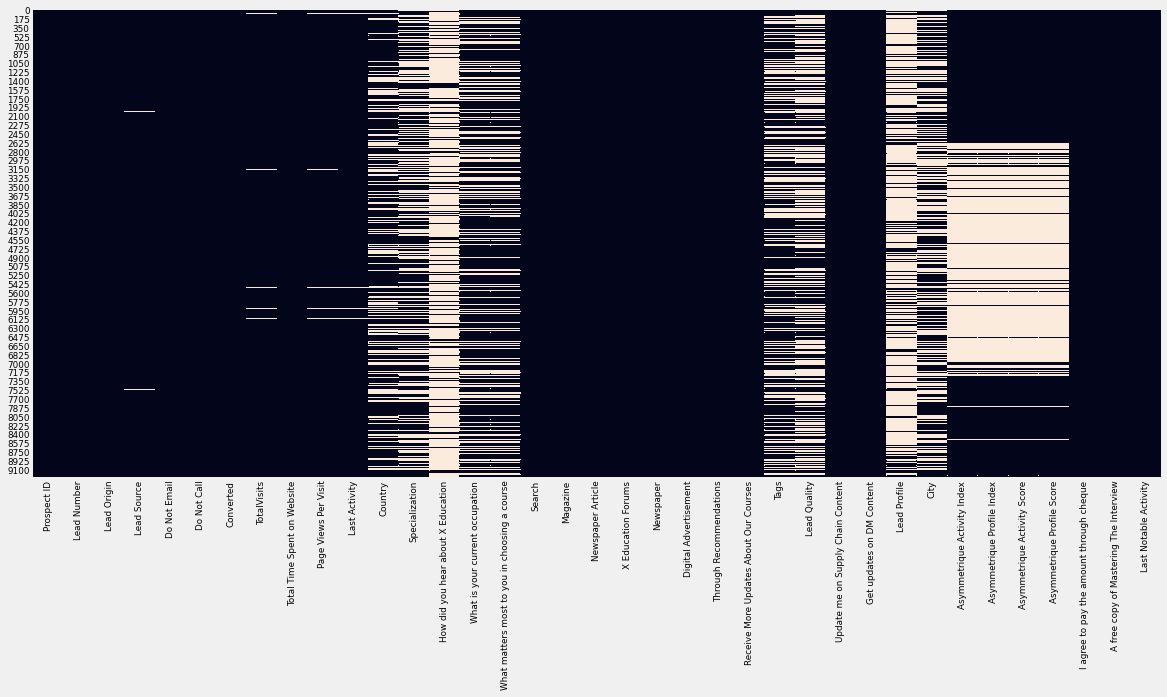

In [193]:
plt.figure(figsize =(18,8))
sns.heatmap(df.isna(),cbar=False)
plt.show()

In [194]:
null_per=pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2)).reset_index()
null_per.columns=['Column Name', 'Null Values Percentage']
null_val=pd.DataFrame(df.isna().sum()).reset_index()
null_val.columns=['Column Name', 'Null Values']
null_df=pd.merge(null_val, null_per, on='Column Name')
null_df=null_df.sort_values("Null Values", ascending = False).reset_index()
null_df.drop('index',1,inplace=True)

In [195]:
null_df

,Column Name,Null Values,Null Values Percentage
0,How did you hear about X Education,7250,78.46
1,Lead Profile,6855,74.19
2,Lead Quality,4767,51.59
3,Asymmetrique Profile Score,4218,45.65
4,Asymmetrique Activity Score,4218,45.65
5,Asymmetrique Activity Index,4218,45.65
6,Asymmetrique Profile Index,4218,45.65
7,City,3669,39.71
8,Specialization,3380,36.58
9,Tags,3353,36.29


Dropping columns which has more than 40% data as null, excluding 'Lead Quality' as that is a significant feature.

In [196]:
df=df.drop(['How did you hear about X Education','Lead Profile','Asymmetrique Activity Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [197]:
# df=df.drop(df.loc[:,list(round((df.isna().sum()/df.shape[0])*100,2)>60)].columns,1)

Finding no.of unique values of each column

In [198]:
for i in df.columns:
    print(i)
    print(df[i].nunique())

Prospect ID
9240
Lead Number
9240
Lead Origin
5
Lead Source
21
Do Not Email
2
Do Not Call
2
Converted
2
TotalVisits
41
Total Time Spent on Website
1731
Page Views Per Visit
114
Last Activity
17
Country
38
Specialization
18
What is your current occupation
6
What matters most to you in choosing a course
3
Search
2
Magazine
1
Newspaper Article
2
X Education Forums
2
Newspaper
2
Digital Advertisement
2
Through Recommendations
2
Receive More Updates About Our Courses
1
Tags
26
Lead Quality
5
Update me on Supply Chain Content
1
Get updates on DM Content
1
City
6
I agree to pay the amount through cheque
1
A free copy of Mastering The Interview
2
Last Notable Activity
16


dropping Lead Number and Prospect ID since they have all unique values

In [199]:
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

Dropping columns having only 1 unique values i.e variance=0 as such columns are insignificant

In [200]:
col_to_drop=df.loc[:,list(df.nunique()==1)].columns

In [201]:
df.drop(col_to_drop,1,inplace=True)

In [202]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,No,Modified


In [203]:
df.shape

(9240, 24)

**Imputing missing values**

### Lead Quality

In [204]:
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

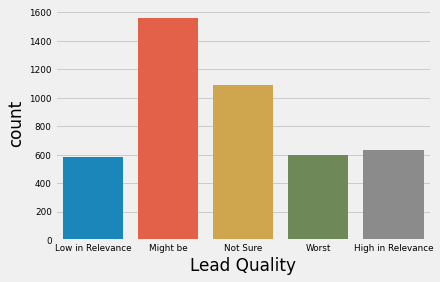

In [205]:
sns.countplot(df['Lead Quality'])

In [206]:
df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

We will impute the nan values with the category 'Not Sure'

In [207]:
df['Lead Quality']=df['Lead Quality'].replace(np.nan,'Not Sure')

In [208]:
df['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

### City

In [209]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

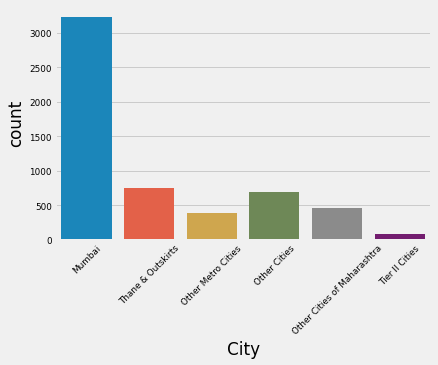

In [210]:
sns.countplot(df['City'])
plt.xticks(rotation=45)
plt.show()

We can impute the missing values with 'Other Cities'

In [211]:
df['City']=df['City'].replace(np.nan, 'Other Cities')

In [212]:
df['City'].value_counts()

Other Cities                   4355
Mumbai                         3222
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

### Specialization

In [213]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

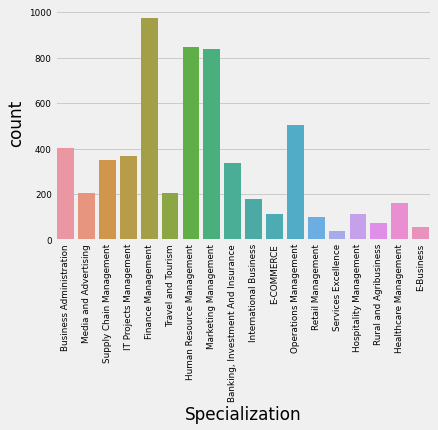

In [214]:
sns.countplot(df['Specialization'])
plt.xticks(rotation=90)
plt.show()

We will add a new category as 'Others' to impute null values

In [215]:
df['Specialization']=df['Specialization'].replace(np.nan,'Others')

In [216]:
df['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### Tags

In [217]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

Tags column seems an insignificant column because values are assigned by the sales team rather than the customer themselves

In [218]:
df.drop('Tags',1,inplace=True)

### Country

In [219]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Sweden                     3
Philippines                2
Netherlands                2
Bangladesh                 2
Italy                      2
Ghana                      2
Asia/Pacific Region        2
Uganda                     2
China                      2
Belgium                    2
Indonesia                  1
Switzerland                1
Vietnam                    1
Liberia                    1
Sri Lanka                  1
Denmark                    1
Russia        

We will impute with mode i.e India

In [220]:
df['Country']=df['Country'].replace(np.nan,'India')

In [221]:
df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Sweden                     3
Philippines                2
Netherlands                2
Bangladesh                 2
Italy                      2
Ghana                      2
Asia/Pacific Region        2
Uganda                     2
China                      2
Belgium                    2
Indonesia                  1
Switzerland                1
Vietnam                    1
Liberia                    1
Sri Lanka                  1
Denmark                    1
Russia        

### Occupation

In [222]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

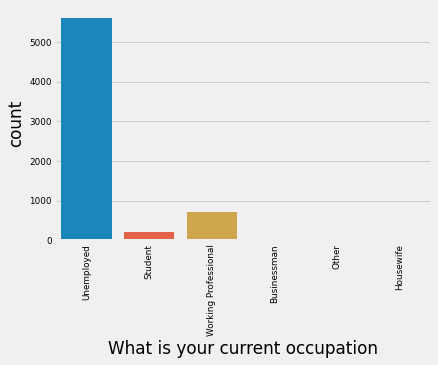

In [223]:
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

We will impute null values with 'Other' field

In [224]:
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Other')

In [225]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

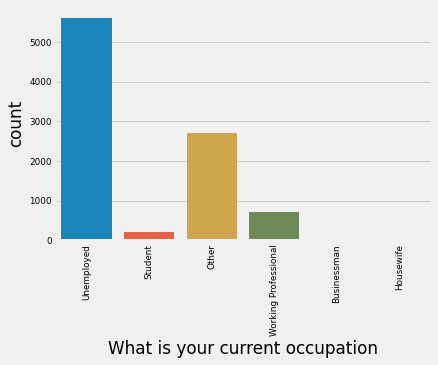

In [226]:
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

### What matters most to you in choosing a course

In [227]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [228]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace(np.nan,'Other')

In [229]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Other                        2710
Flexibility & Convenience       2
Name: What matters most to you in choosing a course, dtype: int64

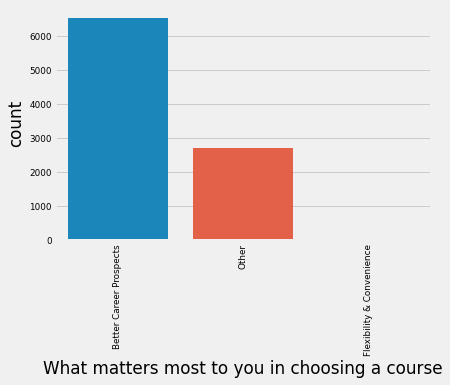

In [230]:
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [231]:
(df.isna().sum()/df.shape[0])*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advert

### TotalVisits

In [232]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits', ylabel='Density'>

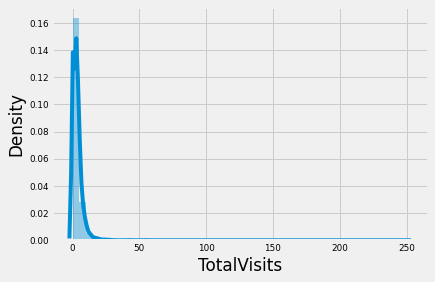

In [233]:
sns.distplot(df['TotalVisits'])

In [234]:
df['TotalVisits']=df['TotalVisits'].fillna(df['TotalVisits'].median())

Imputing the values with median, as distribution is right skewed

### Page Views Per Visit

In [235]:
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Density'>

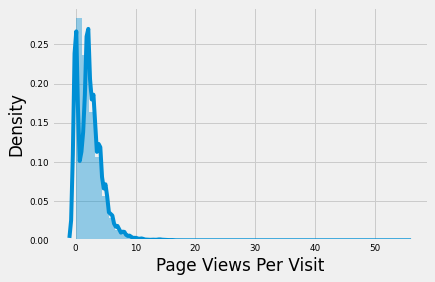

In [236]:
sns.distplot(df['Page Views Per Visit'])

In [237]:
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

Imputing the values with median, as distribution is right skewed

### Last Activity

In [238]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [239]:
df['Last Activity']=df['Last Activity'].replace(np.nan,'Others')

Imputing null values with a new category 'others'

In [240]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Others                           103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

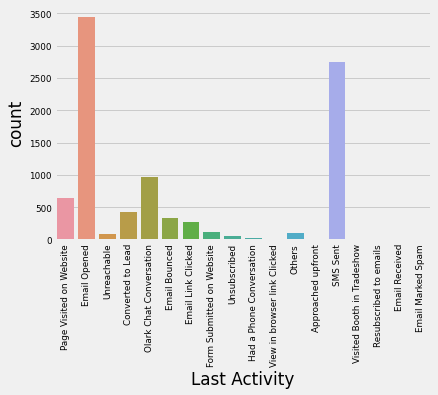

In [241]:
sns.countplot(df['Last Activity'])
plt.xticks(rotation=90)
plt.show()

### Lead Source

In [242]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
blog                    1
testone                 1
NC_EDM                  1
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [243]:
df['Lead Source']=df['Lead Source'].replace(np.nan,'Google')

Imputing null values with Google as it has the highest frequency

In [244]:
# Rest missing values are under 1.5% so we can drop these rows.
# df.dropna(inplace = True)

In [245]:
(df.isna().sum()/df.shape[0])*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [246]:
df.shape

(9240, 23)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

# Exploratory Data Analytics

**Univariate Analysis**

In [248]:
#Converted is the target variable
df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

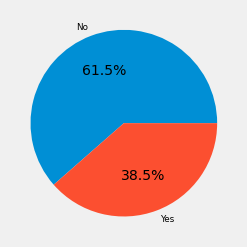

In [249]:
plt.pie(df['Converted'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%')
plt.show()

In [250]:
def countplot(col):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='Converted', data=df)
    plt.xticks(rotation=90)
    plt.show()

**Lead Origin**

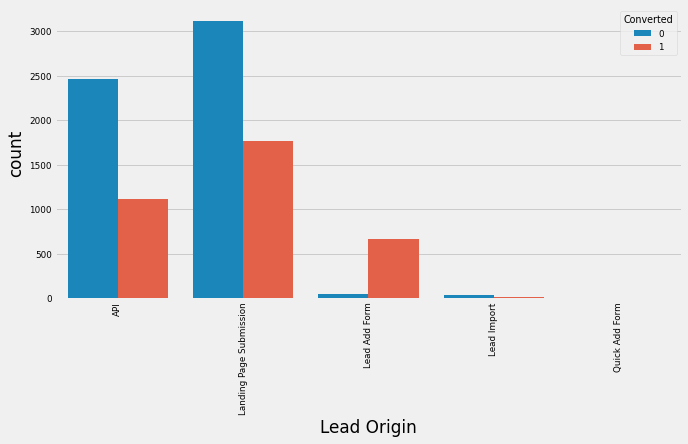

In [251]:
countplot('Lead Origin')

- Count of API and Landing Page Submission is high but coversion rate is not high.
- Lead Add Form has high conversion rate but less count.
- Lead Import has negligible count

**Lead Source**

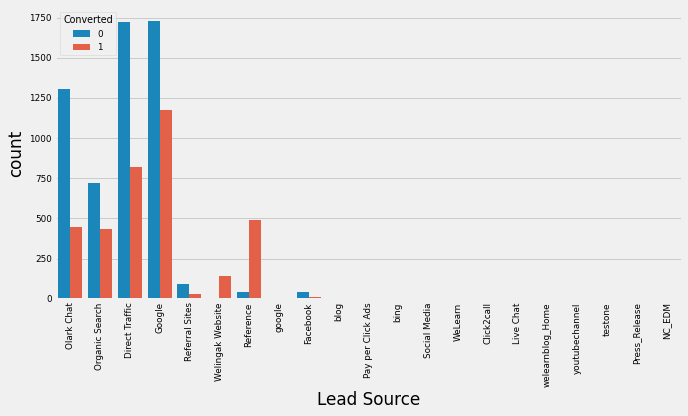

In [252]:
countplot('Lead Source')

In [253]:
df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
blog                    1
testone                 1
NC_EDM                  1
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [254]:
#Some data cleaning is required

In [255]:
df['Lead Source']=df['Lead Source'].replace(['google'],'Google')

In [256]:
#Reducing no.of features to reduce complexity of model
#Merging labels with less value counts to 'Others'

In [257]:
df['Lead Source']=df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [258]:
df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

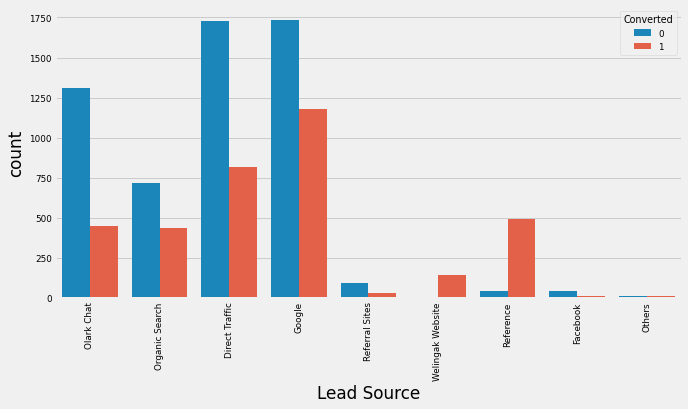

In [259]:
countplot('Lead Source')

- Google and Direct traffic has maximum no.of data points.
- Conversion Rate of reference and welingak website is high.

**Do Not Email & Do Not Call**

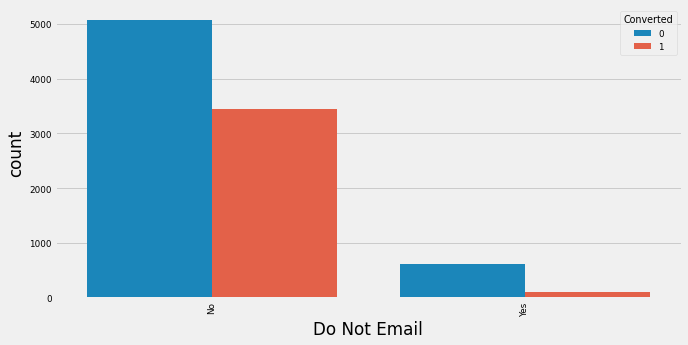

In [262]:
countplot('Do Not Email')

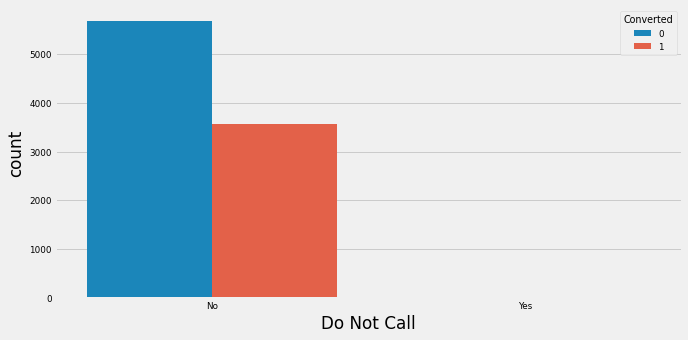

In [263]:
plt.figure(figsize=(10,5))
sns.countplot(x='Do Not Call', hue='Converted', data=df)
plt.show()

**Total Visits**

In [264]:
df['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

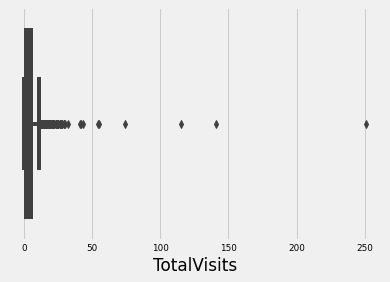

In [265]:
sns.boxplot('TotalVisits',data=df)

In [266]:
q1=df['TotalVisits'].quantile(0.25)
q3=df['TotalVisits'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

In [267]:
uc=df['TotalVisits'].quantile(0.99)
lc=df['TotalVisits'].quantile(0.01)
for i in df.index:
    if df.loc[i,'TotalVisits']<lb:
        df.loc[i,'TotalVisits']=lc
    elif df.loc[i,'TotalVisits']>ub:
        df.loc[i,'TotalVisits']=uc


<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

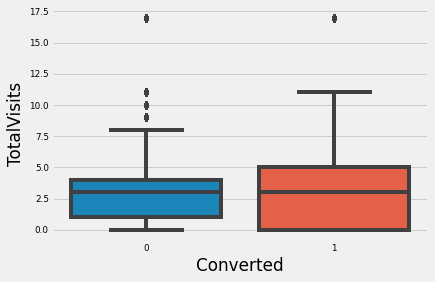

In [268]:
sns.boxplot(y='TotalVisits', x='Converted' ,data=df)

Both the medians are same

**Total Time Spent on Website**

In [270]:
df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

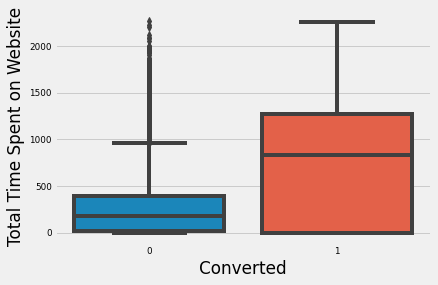

In [271]:
sns.boxplot(y='Total Time Spent on Website', x='Converted' ,data=df)

Median of lead getting converted is high

**Page Views Per Visit**

In [272]:
df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

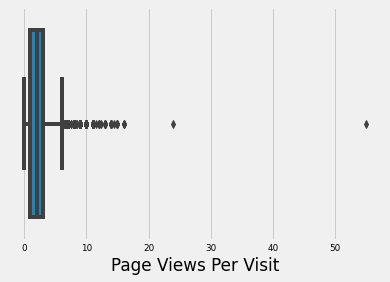

In [273]:
sns.boxplot('Page Views Per Visit',data=df)

In [274]:
q1=df['Page Views Per Visit'].quantile(0.25)
q3=df['Page Views Per Visit'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

In [275]:
uc=df['Page Views Per Visit'].quantile(0.99)
lc=df['Page Views Per Visit'].quantile(0.01)
for i in df.index:
    if df.loc[i,'Page Views Per Visit']<lb:
        df.loc[i,'Page Views Per Visit']=lc
    elif df.loc[i,'Page Views Per Visit']>ub:
        df.loc[i,'Page Views Per Visit']=uc


<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

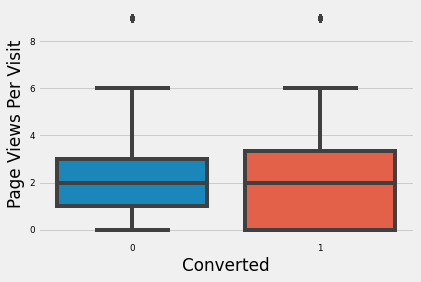

In [276]:
sns.boxplot(y='Page Views Per Visit', x='Converted' ,data=df)

Median is same for both the labels

**Last Activity**

In [277]:
df['Last Activity'].describe()

count             9240
unique              18
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [279]:
#many labels are present

In [280]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Others                           103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Combine the labels with very less counts as 'Other Activity'

In [281]:
df['Last Activity']=df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam','Others'],
                                                      'Other_Activity')

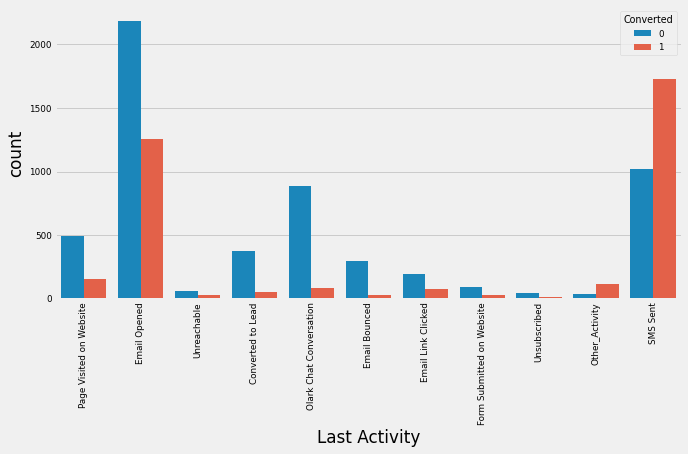

In [282]:
countplot('Last Activity')

- Most of the lead have their Email opened as their last activity.
- Conversion rate for leads with last activity as SMS Sent is highest.

**Specialization**

In [283]:
df.Specialization.value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

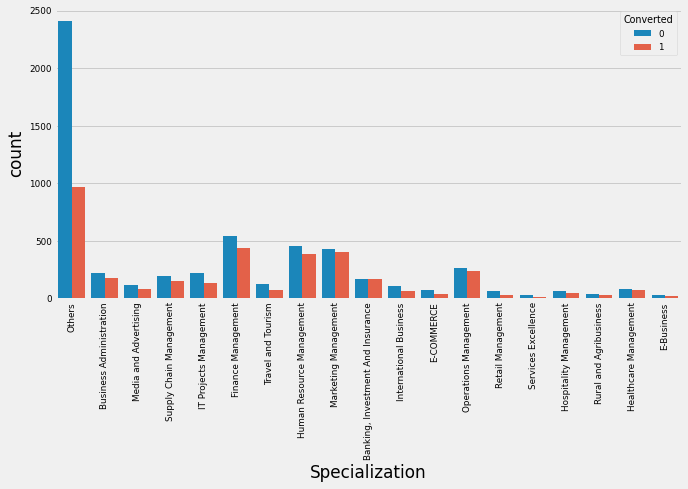

In [284]:
countplot('Specialization')

**occupation**

In [285]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

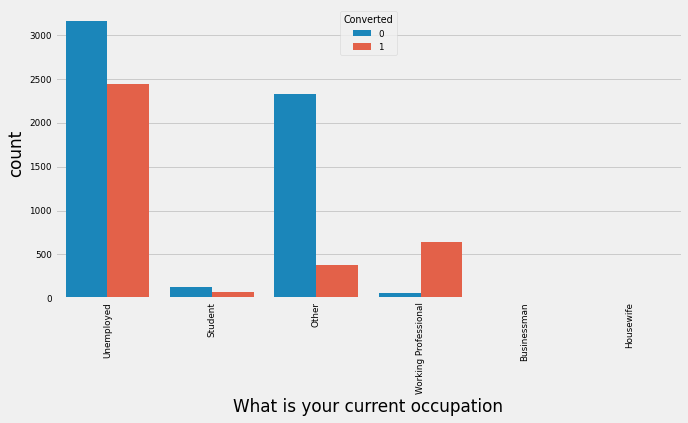

In [286]:
countplot('What is your current occupation')

- Working Professionals have higest conversion rate, but count is not high.
- Unemployed leads are the most in numbers


**What matters most to you in choosing a course**

In [287]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Other                        2710
Flexibility & Convenience       2
Name: What matters most to you in choosing a course, dtype: int64

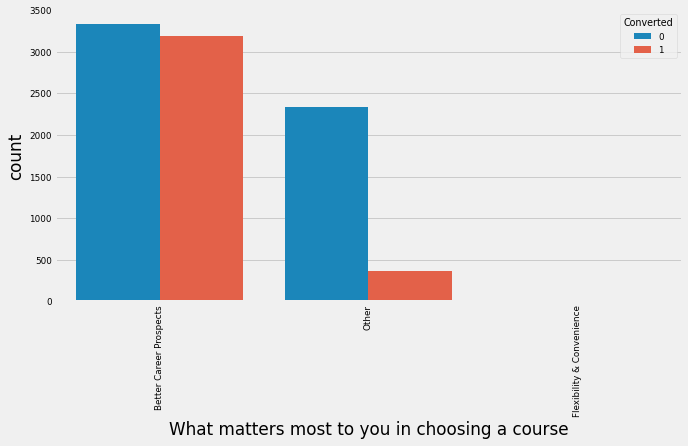

In [288]:
countplot('What matters most to you in choosing a course')

- Here maximum data points are labelled as 'Better Career Prospects'
- Also no diffenrence in target variable is seen for different labels
- So we can say no inference can be drawn from this parameter

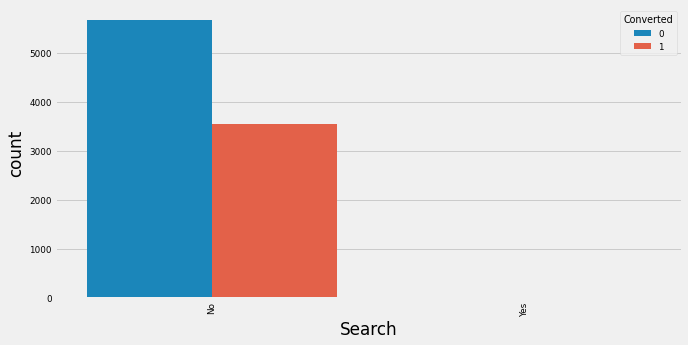

In [289]:
countplot('Search')

- Here maximum data points are labelled as 'No'
- Also no diffenrence in target variable is seen for different labels
- So we can say no inference can be drawn from this parameter

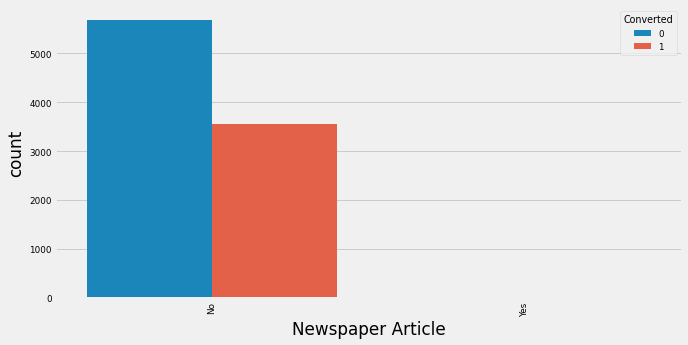

In [290]:
countplot('Newspaper Article')

- Here maximum data points are labelled as 'No'
- Also no diffenrence in target variable is seen for different labels
- So we can say no inference can be drawn from this parameter

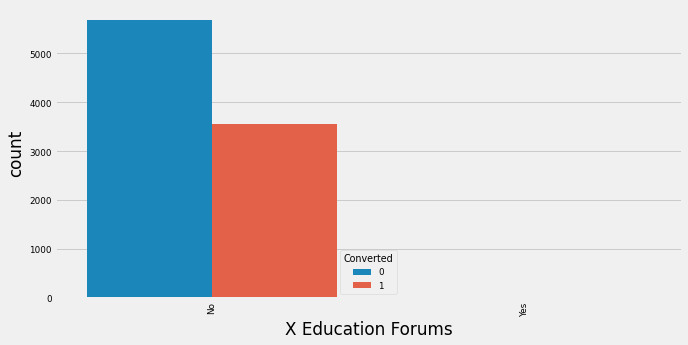

In [291]:
countplot('X Education Forums')

- Here maximum data points are labelled as 'No'
- Also no diffenrence in target variable is seen for different labels
- So we can say no inference can be drawn from this parameter

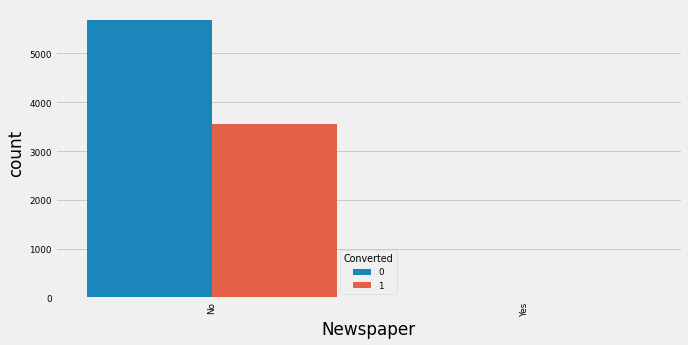

In [292]:
countplot('Newspaper')

- Here maximum data points are labelled as 'No'
- Also no diffenrence in target variable is seen for different labels
- So we can say no inference can be drawn from this parameter

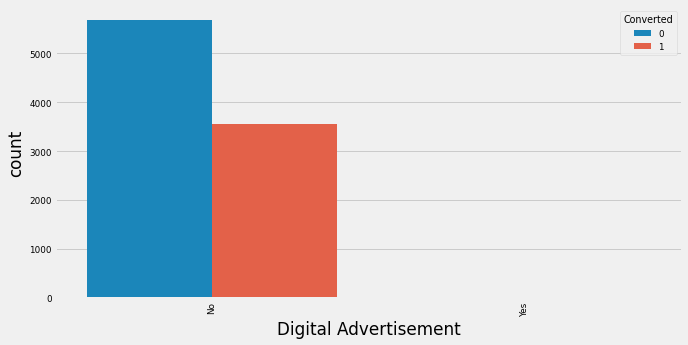

In [293]:
countplot('Digital Advertisement')

- Here maximum data points are labelled as 'No'
- Also no diffenrence in target variable is seen for different labels
- So we can say no inference can be drawn from this parameter

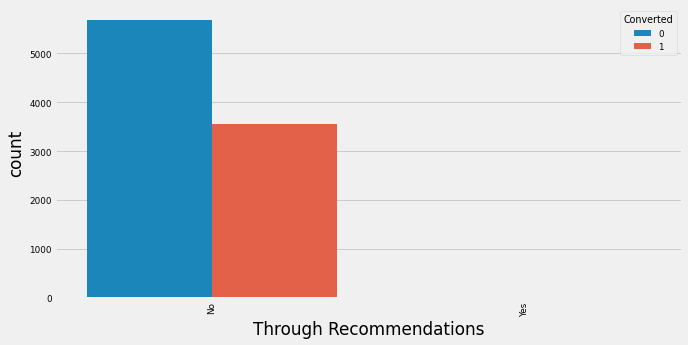

In [294]:
countplot('Through Recommendations')

- Here maximum data points are labelled as 'No'
- Also no diffenrence in target variable is seen for different labels
- So we can say no inference can be drawn from this parameter

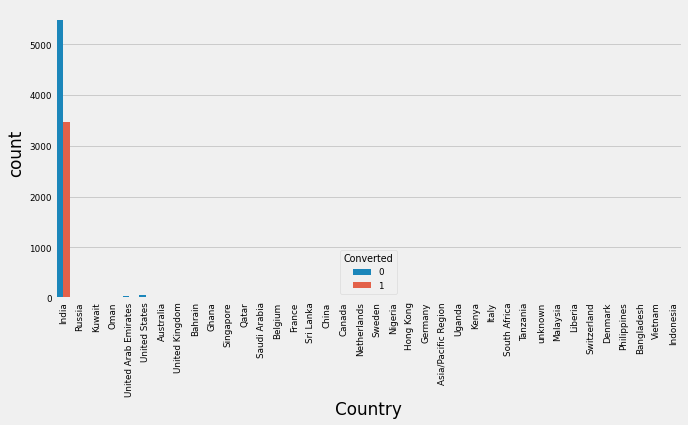

In [295]:
countplot('Country')

In [296]:
df['Country'].value_counts(normalize=True)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Nigeria                  0.043290
South Africa             0.043290
Kuwait                   0.043290
Germany                  0.043290
Canada                   0.043290
Sweden                   0.032468
Philippines              0.021645
Netherlands              0.021645
Bangladesh               0.021645
Italy                    0.021645
Ghana                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
China                    0.021645
Belgium                  0.021645
Indonesia                0.010823
Switzerland   

- we can see that data is heavily skewed and ~96% of data is India
- We must drop the column for model building

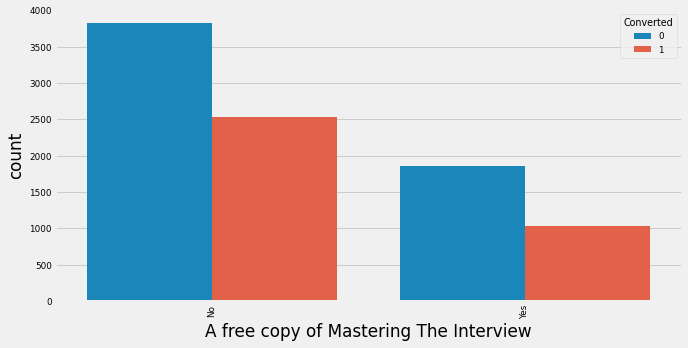

In [297]:
countplot('A free copy of Mastering The Interview')

- Here maximum data points are labelled as 'No'
- Also no diffenrence in target variable is seen for different labels
- So we can say no inference can be drawn from this parameter

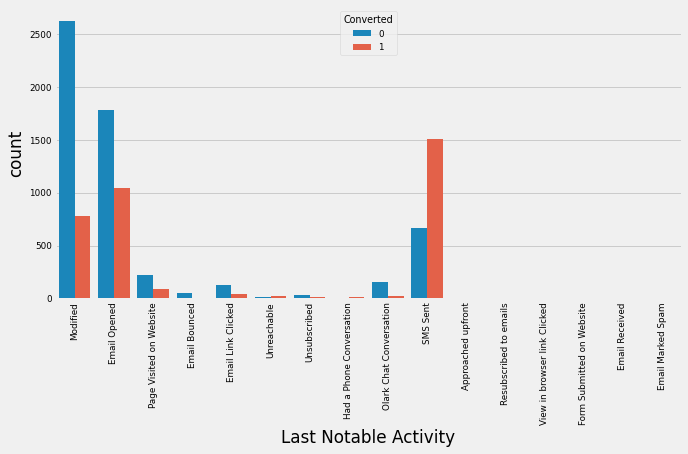

In [298]:
countplot('Last Notable Activity')

- Maximum data points are of 'Modified' and 'Email Opened'
- SMS Sent has significant amount od Data and has the best conversion rate

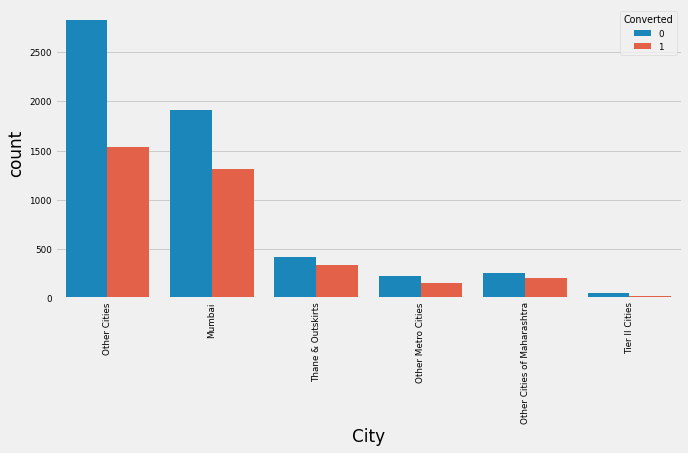

In [299]:
countplot('City')

In [300]:
df['City'].value_counts(normalize=True)*100

Other Cities                   47.132035
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

- ~46% data suggests city is not known and ~35% data is skewed towards Munmbai
- Plot also do not vary for different cities w.r.t to target variable
- Hence we can drop the column as it is insignificant

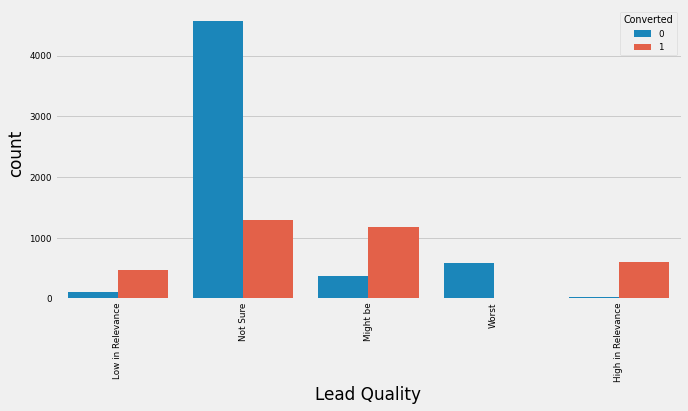

In [301]:
countplot('Lead Quality')

In [302]:
df['Lead Quality'].value_counts(normalize=True)*100

Not Sure             63.409091
Might be             16.883117
High in Relevance     6.893939
Worst                 6.504329
Low in Relevance      6.309524
Name: Lead Quality, dtype: float64

- Most data points have value 'Not Sure'
- Other labels like Might be ,High in Relevance ,Low in Relevance have significant conversion rate

**From above bivarate analysis we drop the below insignificant columns**

In [303]:
df=df.drop(['What matters most to you in choosing a course','Search',
                  'Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations', 'A free copy of Mastering The Interview','Country','City'],1)

In [304]:
df.shape

(9240, 13)

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Do Not Call                      9240 non-null   object 
 4   Converted                        9240 non-null   int64  
 5   TotalVisits                      9240 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9240 non-null   float64
 8   Last Activity                    9240 non-null   object 
 9   Specialization                   9240 non-null   object 
 10  What is your current occupation  9240 non-null   object 
 11  Lead Quality                     9240 non-null   object 
 12  Last Notable Activit

In [306]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Quality,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Low in Relevance,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Not Sure,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Might be,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Not Sure,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Might be,Modified


In [307]:
df.to_csv('eda.csv',index=False)